In [1]:
import pandas as pd

# Load your dataset into a DataFrame
# Assuming your dataset is named 'data.csv'
df = pd.read_csv('clustered_data.csv')

# Display the first few rows of the DataFrame to understand its structure
print("Original DataFrame:")
print(df.head())

# Separate categorical and non-categorical columns
categorical_cols = ['BusinessTravel_code', 'Department_code', 'EducationField_code']  # Add more categorical column names as needed
non_categorical_cols = [col for col in df.columns if col not in categorical_cols]

# Display the categorical and non-categorical columns
print("\nCategorical Columns:")
print(categorical_cols)
print("\nNon-Categorical Columns:")
print(non_categorical_cols)

# Check for missing values and handle them accordingly
# For demonstration, let's assume we'll fill missing numerical values with mean and categorical values with mode
df_non_cat_filled = df[non_categorical_cols].fillna(df[non_categorical_cols].mean())
df_cat_filled = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Combine the filled categorical and non-categorical parts
df_filled = pd.concat([df_non_cat_filled, df_cat_filled], axis=1)

# Display the first few rows of the filled DataFrame
print("\nDataFrame after handling missing values:")
print(df_filled.head())

# Now, let's encode the categorical variables
# For simplicity, we'll use one-hot encoding
df_encoded = pd.get_dummies(df_filled, columns=categorical_cols)

# Display the first few rows of the encoded DataFrame
print("\nDataFrame after encoding categorical variables:")
print(df_encoded.head())



Original DataFrame:
   Attrition_code  BusinessTravel_code  Department_code  EducationField_code  \
0             0.0                  0.0              4.0                  3.0   
1             0.0                  2.0              1.0                  1.0   
2             1.0                  0.0              3.0                  5.0   
3             1.0                  2.0              5.0                  2.0   
4             0.0                  0.0              1.0                  0.0   

   Education_code  EnvironmentSatisfaction_code  JobInvolvement_code  \
0             2.0                           2.0                  1.0   
1             4.0                           0.0                  1.0   
2             1.0                           3.0                  0.0   
3             4.0                           3.0                  1.0   
4             4.0                           1.0                  2.0   

   JobLevel_code  JobSatisfaction_code  PerformanceRating_code  ..

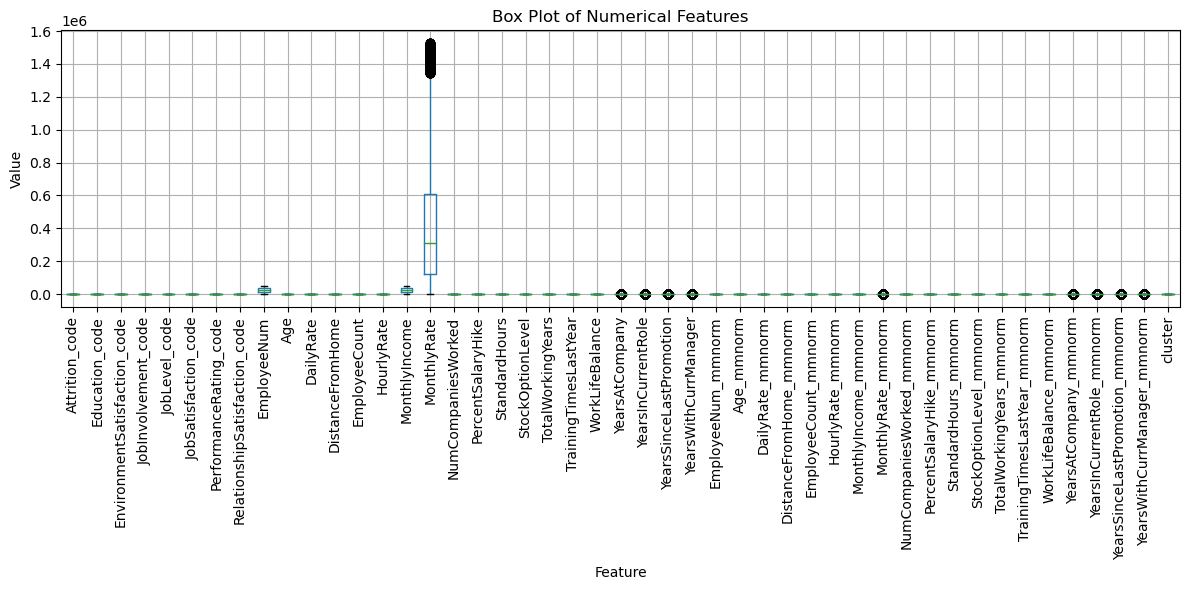


DataFrame after Min-Max Scaling:
   Attrition_code  Education_code  EnvironmentSatisfaction_code  \
0             0.0            0.50                      0.666667   
1             0.0            1.00                      0.000000   
2             1.0            0.25                      1.000000   
3             1.0            1.00                      1.000000   
4             0.0            1.00                      0.333333   

   JobInvolvement_code  JobLevel_code  JobSatisfaction_code  \
0             0.333333           0.50              0.000000   
1             0.333333           0.75              0.666667   
2             0.000000           0.50              0.333333   
3             0.333333           0.75              0.000000   
4             0.666667           0.50              0.333333   

   PerformanceRating_code  RelationshipSatisfaction_code  EmployeeNum  \
0                1.000000                       0.000000      0.00000   
1                0.000000             

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Make box plots for numerical features to visualize their distributions and identify outliers
numerical_cols = non_categorical_cols  # Assuming all remaining non-categorical columns are numerical
df_numerical = df_filled[numerical_cols]

plt.figure(figsize=(12, 6))
df_numerical.boxplot(rot=90)
plt.title('Box Plot of Numerical Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Normalize numerical features using Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_cols)

# Display the first few rows of the scaled DataFrame
print("\nDataFrame after Min-Max Scaling:")
print(df_scaled.head())

In [3]:
# Splitting the data into features (X) and the target variable (y)
X = df_encoded.drop('Attrition_code', axis=1)
y = df_encoded['Attrition_code']


In [4]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [6]:
# Training the Decision Tree classifier
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [7]:
# Making predictions on the testing set
y_pred = dt_classifier.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluating the performance of the Decision Tree classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Printing classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5011619682732141

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50      4923
         1.0       0.50      0.51      0.50      4974

    accuracy                           0.50      9897
   macro avg       0.50      0.50      0.50      9897
weighted avg       0.50      0.50      0.50      9897



In [9]:
from sklearn.tree import export_text

# Get the feature names
feature_names = X.columns.tolist()

# Export the decision tree to text
tree_rules = export_text(dt_classifier, feature_names=feature_names)
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- MonthlyRate_mmnorm <= 0.44
|   |--- MonthlyIncome_mmnorm <= 0.00
|   |   |--- MonthlyIncome_mmnorm <= 0.00
|   |   |   |--- StockOptionLevel <= 3.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- StockOptionLevel >  3.50
|   |   |   |   |--- class: 1.0
|   |   |--- MonthlyIncome_mmnorm >  0.00
|   |   |   |--- DailyRate_mmnorm <= 0.55
|   |   |   |   |--- DistanceFromHome <= 40.50
|   |   |   |   |   |--- Age_mmnorm <= 0.02
|   |   |   |   |   |   |--- TrainingTimesLastYear_mmnorm <= 0.64
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- TrainingTimesLastYear_mmnorm >  0.64
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Age_mmnorm >  0.02
|   |   |   |   |   |   |--- WorkLifeBalance_mmnorm <= 0.50
|   |   |   |   |   |   |   |--- YearsWithCurrManager <= 2.50
|   |   |   |   |   |   |   |   |--- TrainingTimesLastYear_mmnorm <= 0.07
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |  

In [10]:
# Get the feature importances from the trained Decision Tree classifier
feature_importance = dt_classifier.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                 Feature  Importance
33    MonthlyRate_mmnorm    0.037916
9              DailyRate    0.037823
26    EmployeeNum_mmnorm    0.036460
14           MonthlyRate    0.036452
7            EmployeeNum    0.035406
..                   ...         ...
51   Department_code_2.0    0.003013
36  StandardHours_mmnorm    0.000000
17         StandardHours    0.000000
11         EmployeeCount    0.000000
30  EmployeeCount_mmnorm    0.000000

[61 rows x 2 columns]


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5011619682732141
Precision: 0.5037037037037037
Recall: 0.5058303176517893
F1-score: 0.5047647707894473
Confusion Matrix:
[[2444 2479]
 [2458 2516]]


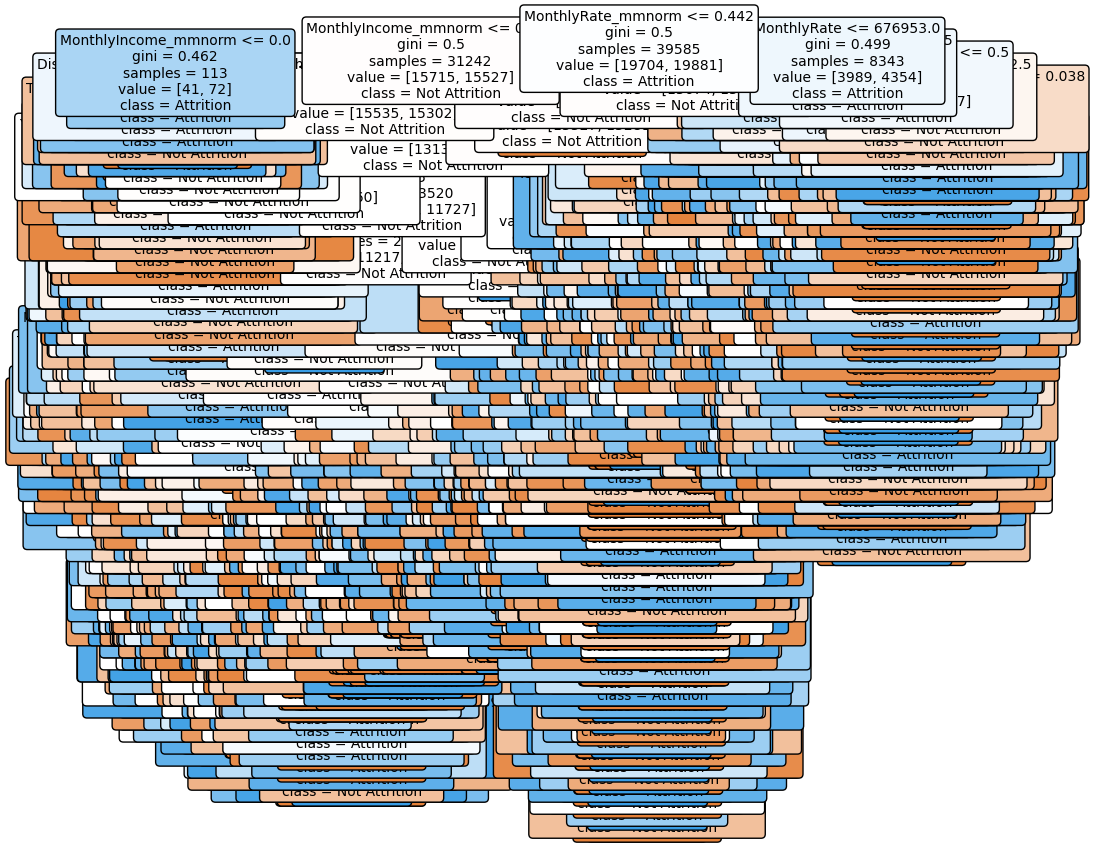

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set a larger figure size for better clarity
plt.figure(figsize=(10, 10))

# Plot the decision tree
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Attrition', 'Attrition'], rounded=True, filled=True, fontsize=10)

# Show the plot
plt.show()

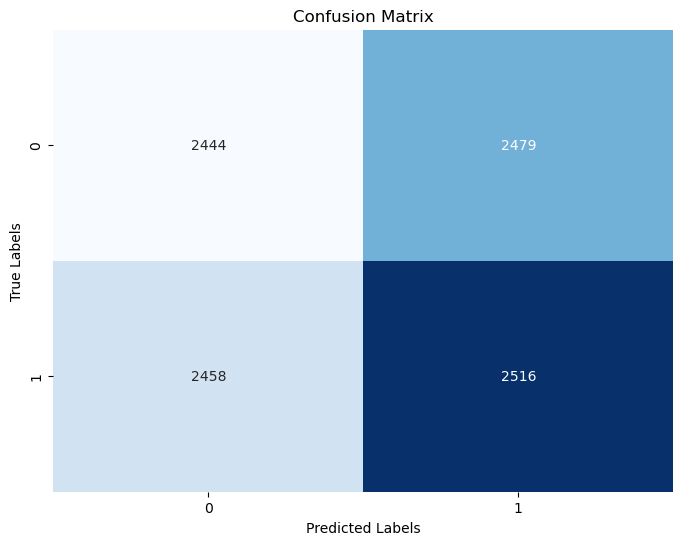

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [14]:
from sklearn.metrics import accuracy_score

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, dt_classifier.predict(X_train))
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.5011619682732141


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Define your decision tree classifier with desired parameters
dt_classifier = DecisionTreeClassifier()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.49905267 0.49425287 0.50170519 0.50284199 0.50486295]
Mean CV Score: 0.5005431350258938


In [18]:
# Make predictions on the testing set
predicted_labels = dt_classifier.predict(X_test)

# Compute F1 score
f1 = f1_score(y_test, predicted_labels)

# Weighted F1 score
weighted_f1 = f1_score(y_test, predicted_labels, average='weighted')

print("F1 Score:", f1)
print("Weighted F1 Score:", weighted_f1)




F1 Score: 0.5047647707894473
Weighted F1 Score: 0.5011542676266145


In [19]:
pip install psutil

In [22]:
# Importing necessary modules
import time
import psutil
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Function to measure memory usage
def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / 1024 ** 2  # Memory usage in MB

# Start time
start_time = time.time()

# Data preprocessing and splitting
# Assuming you have your data loaded into X and y
# Replace X and y with your actual data
# Replace X and y with your actual data
X = df_encoded.drop('Attrition_code', axis=1)  # Assuming 'Attrition_code' is the target column
y = df_encoded['Attrition_code']

# End time
preprocessing_end_time = time.time()

# Time taken for data preprocessing and splitting
preprocessing_time = preprocessing_end_time - start_time

# Memory usage after data preprocessing
memory_after_preprocessing = get_memory_usage()

# Decision Tree
# Initializing the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Cross-validation for Decision Tree
# Perform cross-validation
cv_scores = cross_val_score(dt_classifier, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# End time for the entire process
end_time = time.time()

# Total time taken
total_time = end_time - start_time

# Memory usage at the end
memory_at_end = get_memory_usage()

# Print time taken for each step
print("Time taken for data preprocessing and splitting:", preprocessing_time, "seconds")
print("Total time taken:", total_time, "seconds")

# Print memory usage
print("Memory usage after data preprocessing:", memory_after_preprocessing, "MB")
print("Memory usage at the end:", memory_at_end, "MB")



Cross-Validation Scores: [0.50227342 0.49216934 0.49969685 0.50121261 0.49777688]
Time taken for data preprocessing and splitting: 0.03917074203491211 seconds
Total time taken: 9.769406080245972 seconds
Memory usage after data preprocessing: 324.23828125 MB
Memory usage at the end: 318.0 MB


RANDOM FOREST

In [25]:
pip install wordcloud


                                              0.0/300.2 kB ? eta -:--:--
                                              0.0/300.2 kB ? eta -:--:--
                                              0.0/300.2 kB ? eta -:--:--
                                              0.0/300.2 kB ? eta -:--:--
                                              0.0/300.2 kB ? eta -:--:--
                                              0.0/300.2 kB ? eta -:--:--
                                              0.0/300.2 kB ? eta -:--:--
                                              0.0/300.2 kB ? eta -:--:--
                                              0.0/300.2 kB ? eta -:--:--
                                              0.0/300.2 kB ? eta -:--:--
                                              0.0/300.2 kB ? eta -:--:--
                                              0.0/300.2 kB ? eta -:--:--
     ----------                              81.9/300.2 kB 2.3 MB/s eta 0:00:01
     -----------                            

In [27]:
pip install graphviz


                                              0.0/47.1 kB ? eta -:--:--
     ---------------------------------------- 47.1/47.1 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
## Data Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from wordcloud import WordCloud
from collections import Counter
from scipy import stats
from sklearn.tree import plot_tree
import graphviz
from IPython.display import display
from collections import Counter

## Machine Learning Models and Evaluation Metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.tree import export_graphviz

In [29]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [30]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.502576538344953

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.52      0.51      4923
         1.0       0.51      0.49      0.50      4974

    accuracy                           0.50      9897
   macro avg       0.50      0.50      0.50      9897
weighted avg       0.50      0.50      0.50      9897


Confusion Matrix:
[[2556 2367]
 [2556 2418]]


In [31]:
# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Print feature importances
feature_importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort feature importances in descending order
for idx in sorted_indices:
    print(f"Feature: {X.columns[idx]}, Importance: {feature_importances[idx]}")


Feature: EmployeeNum, Importance: 0.036168706945237224
Feature: DailyRate, Importance: 0.03612417545336607
Feature: EmployeeNum_mmnorm, Importance: 0.03611407987263759
Feature: DailyRate_mmnorm, Importance: 0.03586348698837171
Feature: MonthlyIncome, Importance: 0.0358318373221841
Feature: MonthlyIncome_mmnorm, Importance: 0.03580535181772468
Feature: MonthlyRate, Importance: 0.03545915555331181
Feature: MonthlyRate_mmnorm, Importance: 0.035433290251020454
Feature: HourlyRate_mmnorm, Importance: 0.03306504742348633
Feature: HourlyRate, Importance: 0.03286001424800521
Feature: DistanceFromHome, Importance: 0.029242308647326666
Feature: PercentSalaryHike_mmnorm, Importance: 0.028978794392327912
Feature: DistanceFromHome_mmnorm, Importance: 0.028684108645612952
Feature: PercentSalaryHike, Importance: 0.028682026731452183
Feature: Age, Importance: 0.027583662915232468
Feature: Age_mmnorm, Importance: 0.027321253867399906
Feature: TotalWorkingYears, Importance: 0.025824145408529713
Feature:

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the training set
y_train_pred = rf_classifier.predict(X_train)

# Training Set Confusion Matrix
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
print("Training Set Confusion Matrix:")
print(train_confusion_matrix)

# Training Set Classification Report
train_classification_report = classification_report(y_train, y_train_pred)
print("\nTraining Set Classification Report:")
print(train_classification_report)


Training Set Confusion Matrix:
[[19704     0]
 [    0 19881]]

Training Set Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19704
         1.0       1.00      1.00      1.00     19881

    accuracy                           1.00     39585
   macro avg       1.00      1.00      1.00     39585
weighted avg       1.00      1.00      1.00     39585



In [33]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the testing set
y_test_pred = rf_classifier.predict(X_test)

# Testing Set Confusion Matrix
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
print("Testing Set Confusion Matrix:")
print(test_confusion_matrix)

# Testing Set Classification Report
test_classification_report = classification_report(y_test, y_test_pred)
print("\nTesting Set Classification Report:")
print(test_classification_report)


Testing Set Confusion Matrix:
[[2556 2367]
 [2556 2418]]

Testing Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.52      0.51      4923
         1.0       0.51      0.49      0.50      4974

    accuracy                           0.50      9897
   macro avg       0.50      0.50      0.50      9897
weighted avg       0.50      0.50      0.50      9897



In [35]:
from collections import defaultdict

# Initialize a dictionary to store tree frequencies and rules
tree_frequencies = defaultdict(int)
tree_rules = defaultdict(list)

# Loop through the trees and count their frequency while storing rules
for i, tree in enumerate(rf_classifier.estimators_):
    # Convert the tree to a string representation
    tree_str = export_text(tree, feature_names=list(X.columns))
    
    # Increment the frequency count for this tree
    tree_frequencies[tree_str] += 1
    
    # Store the rules for this tree
    tree_rules[tree_str].append(i)

# Get the three most frequent trees
most_frequent_trees = sorted(tree_frequencies.items(), key=lambda x: x[1], reverse=True)[:3]

# Print the most frequent trees and their frequencies
for tree_str, frequency in most_frequent_trees:
    print(f"Tree:\n{tree_str}\nFrequency: {frequency}\n")


Tree:
|--- TotalWorkingYears_mmnorm <= 0.99
|   |--- DailyRate <= 557.50
|   |   |--- YearsWithCurrManager_mmnorm <= 0.73
|   |   |   |--- YearsAtCompany <= 35.50
|   |   |   |   |--- DailyRate_mmnorm <= 0.21
|   |   |   |   |   |--- YearsWithCurrManager_mmnorm <= 0.09
|   |   |   |   |   |   |--- MonthlyIncome_mmnorm <= 0.98
|   |   |   |   |   |   |   |--- YearsInCurrentRole_mmnorm <= 0.04
|   |   |   |   |   |   |   |   |--- HourlyRate_mmnorm <= 0.14
|   |   |   |   |   |   |   |   |   |--- HourlyRate <= 30.50
|   |   |   |   |   |   |   |   |   |   |--- Age_mmnorm <= 0.86
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Age_mmnorm >  0.86
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- HourlyRate >  30.50
|   |   |   |   |   |   |   |   |   |   |--- HourlyRate <= 32.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |

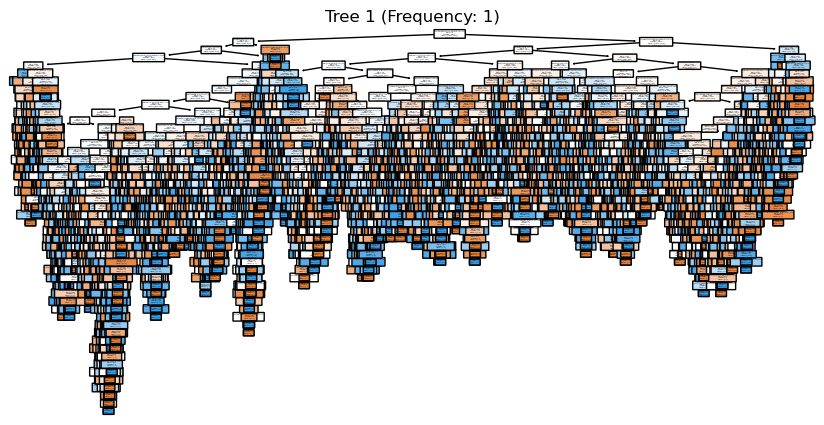

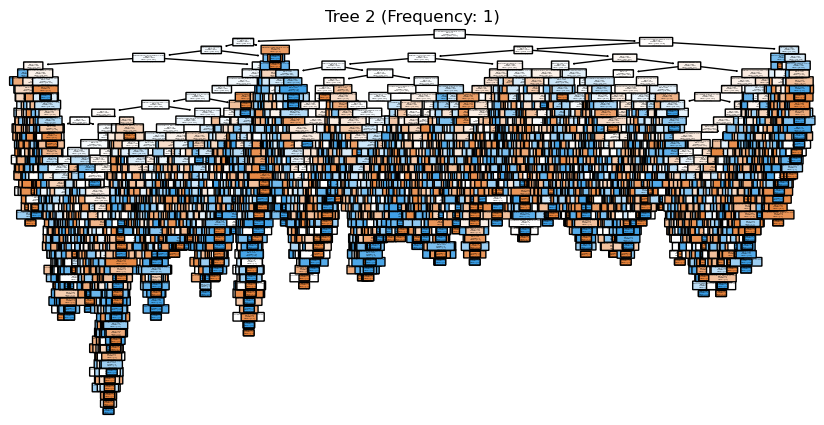

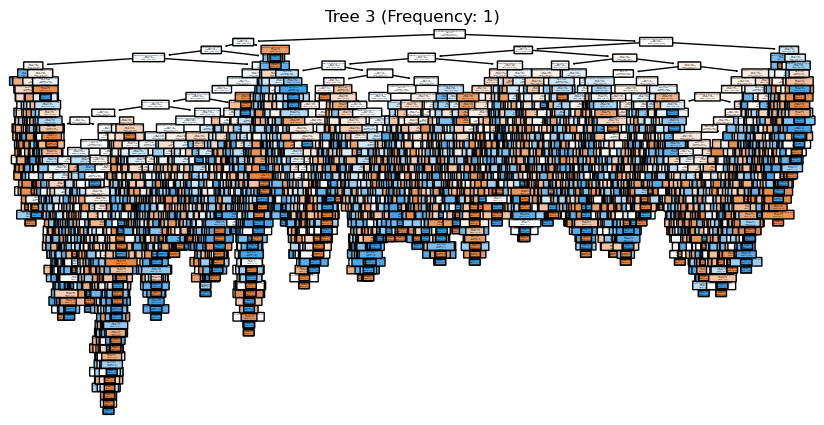

In [36]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Initialize a dictionary to store tree frequencies
tree_frequencies = defaultdict(int)

# Loop through the trees and count their frequency
for tree in rf_classifier.estimators_:
    # Convert the tree to a string representation
    tree_str = export_text(tree, feature_names=list(X.columns))
    
    # Increment the frequency count for this tree
    tree_frequencies[tree_str] += 1

# Get the three most frequent trees
most_frequent_trees = sorted(tree_frequencies.items(), key=lambda x: x[1], reverse=True)[:3]

# Plot the top three trees
for i, (tree_str, frequency) in enumerate(most_frequent_trees, 1):
    # Plot the tree
    plt.figure(figsize=(10, 5))
    plot_tree(tree, feature_names=list(X.columns), filled=True, rounded=True, class_names=True)
    plt.title(f"Tree {i} (Frequency: {frequency})")
    plt.show()


Time taken: 17.72181487083435 seconds
Memory used: 227.5078125 MB
Train accuracy: 1.0
Test accuracy: 0.5037890269778721
Feature Importances:
Feature 1: 0.01482163578641164
Feature 2: 0.012387161393521423
Feature 3: 0.012591006787345215
Feature 4: 0.01469914367651825
Feature 5: 0.01240784309464545
Feature 6: 0.012383420271681413
Feature 7: 0.01219071039884398
Feature 8: 0.0353401765284421
Feature 9: 0.028303362451714668
Feature 10: 0.03558559943416521
Feature 11: 0.02915833949525768
Feature 12: 0.0
Feature 13: 0.033086771403507985
Feature 14: 0.035487184719836674
Feature 15: 0.035724358422482255
Feature 16: 0.01734939028690174
Feature 17: 0.02886202828846683
Feature 18: 0.0
Feature 19: 0.010503078284270157
Feature 20: 0.02606261967906833
Feature 21: 0.013623992951322723
Feature 22: 0.010475835174013048
Feature 23: 0.02041964485421447
Feature 24: 0.01820710117849342
Feature 25: 0.01812618424664332
Feature 26: 0.017945424902651396
Feature 27: 0.035560459345906244
Feature 28: 0.02836131027

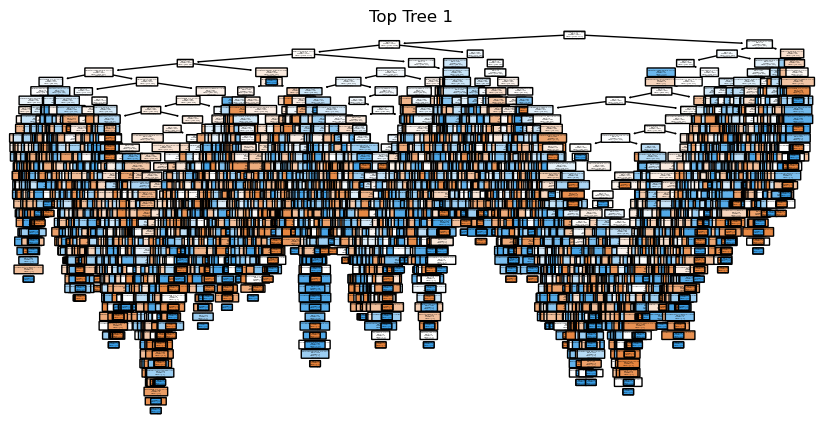

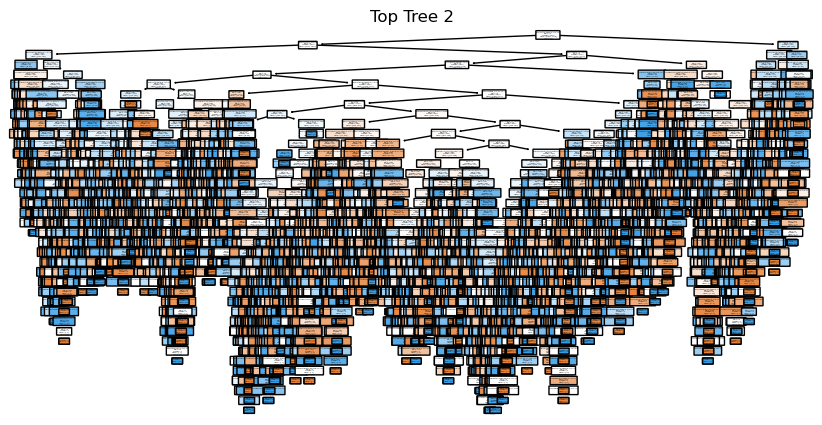

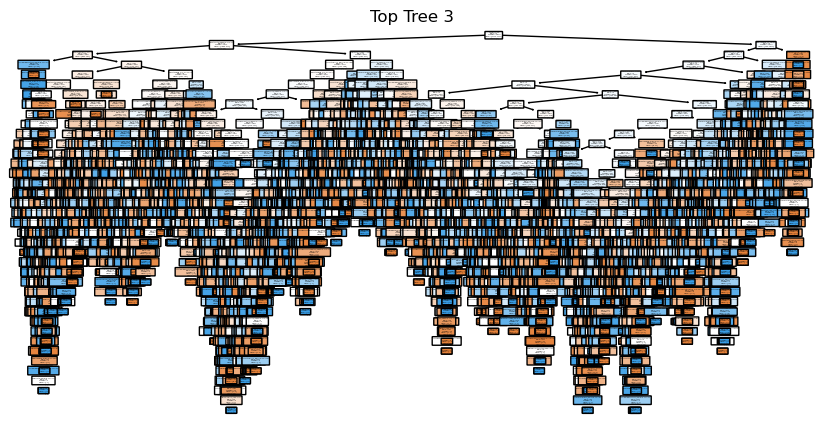

In [37]:
import time
import psutil
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to measure memory usage
def memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / 1024 ** 2  # Memory usage in MB

# Start time
start_time = time.time()

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predictions
train_predictions = rf_classifier.predict(X_train)
test_predictions = rf_classifier.predict(X_test)

# End time
end_time = time.time()

# Time taken
time_taken = end_time - start_time

# Memory usage
memory_used = memory_usage()

# Accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print time, memory usage, and accuracy
print(f"Time taken: {time_taken} seconds")
print(f"Memory used: {memory_used} MB")
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

# Print feature importances
feature_importances = rf_classifier.feature_importances_
print("Feature Importances:")
for i, importance in enumerate(feature_importances, 1):
    print(f"Feature {i}: {importance}")

# Print confusion matrix and classification report for training set
print("Training Set Confusion Matrix:")
print(confusion_matrix(y_train, train_predictions))
print("\nTraining Set Classification Report:")
print(classification_report(y_train, train_predictions))

# Print confusion matrix and classification report for testing set
print("Testing Set Confusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print("\nTesting Set Classification Report:")
print(classification_report(y_test, test_predictions))

# Export and visualize the first three decision trees
for i, tree in enumerate(rf_classifier.estimators_[:3], 1):
    tree_str = export_text(tree, feature_names=X.columns.tolist())
    print(f"Tree {i}:")
    print(tree_str)

# Initialize a dictionary to store tree frequencies and rules
tree_frequencies = defaultdict(int)

# Loop through the trees and count their frequency while storing rules
for tree in rf_classifier.estimators_:
    tree_str = export_text(tree, feature_names=X.columns.tolist())
    tree_frequencies[tree_str] += 1

# Get the three most frequent trees
most_frequent_trees = sorted(tree_frequencies.items(), key=lambda x: x[1], reverse=True)[:3]

# Print the rules for the top three trees
for i, (tree_str, frequency) in enumerate(most_frequent_trees, 1):
    print(f"Top Tree {i}:")
    print(tree_str)

# Initialize a dictionary to store tree frequencies
tree_frequencies = defaultdict(int)

# Loop through the trees and count their frequency
for tree in rf_classifier.estimators_:
    tree_str = export_text(tree, feature_names=X.columns.tolist())
    tree_frequencies[tree_str] += 1

# Get the three most frequent trees
most_frequent_trees = sorted(tree_frequencies.items(), key=lambda x: x[1], reverse=True)[:3]

# Plot the top three trees
for i, (tree_str, _) in enumerate(most_frequent_trees, 1):
    tree = rf_classifier.estimators_[i - 1]
    plt.figure(figsize=(10, 5))
    plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, class_names=True)
    plt.title(f"Top Tree {i}")
    plt.show()


In [39]:
import psutil
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Function to measure memory usage
def memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / 1024 ** 2  # Memory usage in MB

# Load sample data (you can replace this with your actual data)
data = load_iris()
X = data.data
y = data.target

# Data preprocessing and splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store results
results = []

# Decision Tree
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)
dt_mean_cv_score = dt_cv_scores.mean()

# Append Decision Tree results to lists
results.append(('Decision Tree', dt_mean_cv_score, memory_usage()))

# Random Forest
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
rf_mean_cv_score = rf_cv_scores.mean()

# Append Random Forest results to lists
results.append(('Random Forest', rf_mean_cv_score, memory_usage()))

# Create DataFrame
df_results = pd.DataFrame(results, columns=['Model', 'Mean CV Score', 'Memory Usage'])

# Print DataFrame
print(df_results)


           Model  Mean CV Score  Memory Usage
0  Decision Tree       0.950000    386.156250
1  Random Forest       0.933333    373.738281
